# Q8: Results

**Phase 9:** Results & Insights  
**Points: 3 points**

**Focus:** Generate final visualizations, create summary tables, document key findings.

**Lecture Reference:** Lecture 11, Notebook 4 ([`11/demo/04_modeling_results.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/04_modeling_results.ipynb)), Phase 9. Also see Lecture 07 (visualization).

---

## Setup

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load model results from Q7
predictions = pd.read_csv('output/q7_predictions.csv')
metrics = open('output/q7_model_metrics.txt').read()
feature_importance = pd.read_csv('output/q7_feature_importance.csv')

---

## Objective

Generate final visualizations, create summary tables, and document key findings.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q8_final_visualizations.png`
**Format:** PNG image file
**Content:** Final summary visualizations
**Required visualizations (at least 2 of these):**
1. **Model performance comparison:** Bar plot or line plot comparing R², RMSE, or MAE across models
2. **Predictions vs Actual:** Scatter plot showing predicted vs actual values (with perfect prediction line)
3. **Feature importance:** Bar plot showing top N features by importance
4. **Residuals plot:** Scatter plot of residuals (actual - predicted) vs predicted

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

### 2. `output/q8_summary.csv`
**Format:** CSV file
**Content:** Key findings summary table
**Required columns:**
- `Metric` - Metric name (e.g., "R² Score", "RMSE", "MAE")
- One column per model (e.g., `Linear Regression`, `Random Forest`, `XGBoost`)

**Requirements:**
- Must include at least R², RMSE, MAE metrics
- One row per metric
- **No index column** (save with `index=False`)

**Example:**
```csv
Metric,Linear Regression,Random Forest,XGBoost
R² Score,-0.0201,0.9705,0.9967
RMSE,12.7154,2.1634,0.7276
MAE,9.8468,1.3545,0.4480
```

### 3. `output/q8_key_findings.txt`
**Format:** Plain text file
**Content:** Text summary of main insights
**Required information:**
- Best performing model and why
- Key findings from feature importance
- Temporal patterns identified
- Data quality summary

**Example format:**
```
KEY FINDINGS SUMMARY
===================

MODEL PERFORMANCE:
- Best performing model: XGBoost (R² = 0.9967)
- All models show reasonable performance (R² > 0.7 for tree-based models)
- XGBoost achieves lowest RMSE: 0.73°C

FEATURE IMPORTANCE:
- Most important feature: Air Temperature (importance: 0.6539)
- Top 3 features account for 93.6% of total importance
- Temporal features (hour, month) are highly important

TEMPORAL PATTERNS:
- Clear seasonal patterns in temperature data
- Daily and monthly cycles are important predictors

DATA QUALITY:
- Dataset cleaned: 50,000 → 50,000 rows
- Missing values handled via forward-fill and median imputation
- Outliers capped using IQR method
```

---

## Requirements Checklist

- [ ] Final visualizations created (model performance, key insights)
- [ ] Summary tables generated
- [ ] Key findings documented
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Create visualizations** - Multi-panel figure with model comparison, predictions vs actual, feature importance, and/or residuals
2. **Create summary table** - DataFrame with metrics as rows and models as columns
3. **Document key findings** - Text summary covering model performance, feature importance insights, temporal patterns, and data quality notes

---

## Decision Points

- **Visualizations:** What best communicates your findings? Model performance plots? Time series with predictions? Feature importance plots?
- **Summary:** What are the key takeaways? Document the most important findings from your analysis.

---

## Checkpoint

After Q8, you should have:
- [ ] Final visualizations created (2+ plots)
- [ ] Summary tables generated
- [ ] Key findings documented
- [ ] All 3 artifacts saved: `q8_final_visualizations.png`, `q8_summary.csv`, `q8_key_findings.txt`

---

**Next:** Continue to `q9_writeup.md` for Writeup.


### 1. `output/q8_final_visualizations.png`
**Format:** PNG image file
**Content:** Final summary visualizations
**Required visualizations (at least 2 of these):**
1. **Model performance comparison:** Bar plot or line plot comparing R², RMSE, or MAE across models
2. **Predictions vs Actual:** Scatter plot showing predicted vs actual values (with perfect prediction line)
3. **Feature importance:** Bar plot showing top N features by importance
4. **Residuals plot:** Scatter plot of residuals (actual - predicted) vs predicted

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)


In [4]:
import re

# # Your metrics string
# metrics = """MODEL PERFORMANCE METRICS
# ========================

# LINEAR REGRESSION:
#   Train R²: 0.65
#   Test R²:  0.46
#   Train RMSE: 6.24
#   Test RMSE:  7.44
#   Train MAE:  3.86
#   Test MAE:   4.90

# XGBOOST:
#   Train R²: 0.90
#   Test R²:  0.79
#   Train RMSE: 3.26
#   Test RMSE:  4.68
#   Train MAE:  1.64
#   Test MAE:   2.74
# """

# Extract all R² values
r2_values = re.findall(r'R²:\s*(\d+\.\d+)', metrics)
print("All R² values:", r2_values)  # ['0.65', '0.46', '0.90', '0.79']

# Extract all RMSE values
rmse_values = re.findall(r'RMSE:\s*(\d+\.\d+)', metrics)
print("All RMSE values:", rmse_values)  # ['6.24', '7.44', '3.26', '4.68']

# Extract all MAE values
mae_values = re.findall(r'MAE:\s*(\d+\.\d+)', metrics)
print("All MAE values:", mae_values)  # ['3.86', '4.90', '1.64', '2.74']

# Convert to float
r2_floats = [float(x) for x in r2_values]
rmse_floats = [float(x) for x in rmse_values]
mae_floats = [float(x) for x in mae_values]

All R² values: ['0.65', '0.46', '0.90', '0.79']
All RMSE values: ['6.24', '7.44', '3.26', '4.68']
All MAE values: ['3.86', '4.90', '1.64', '2.74']


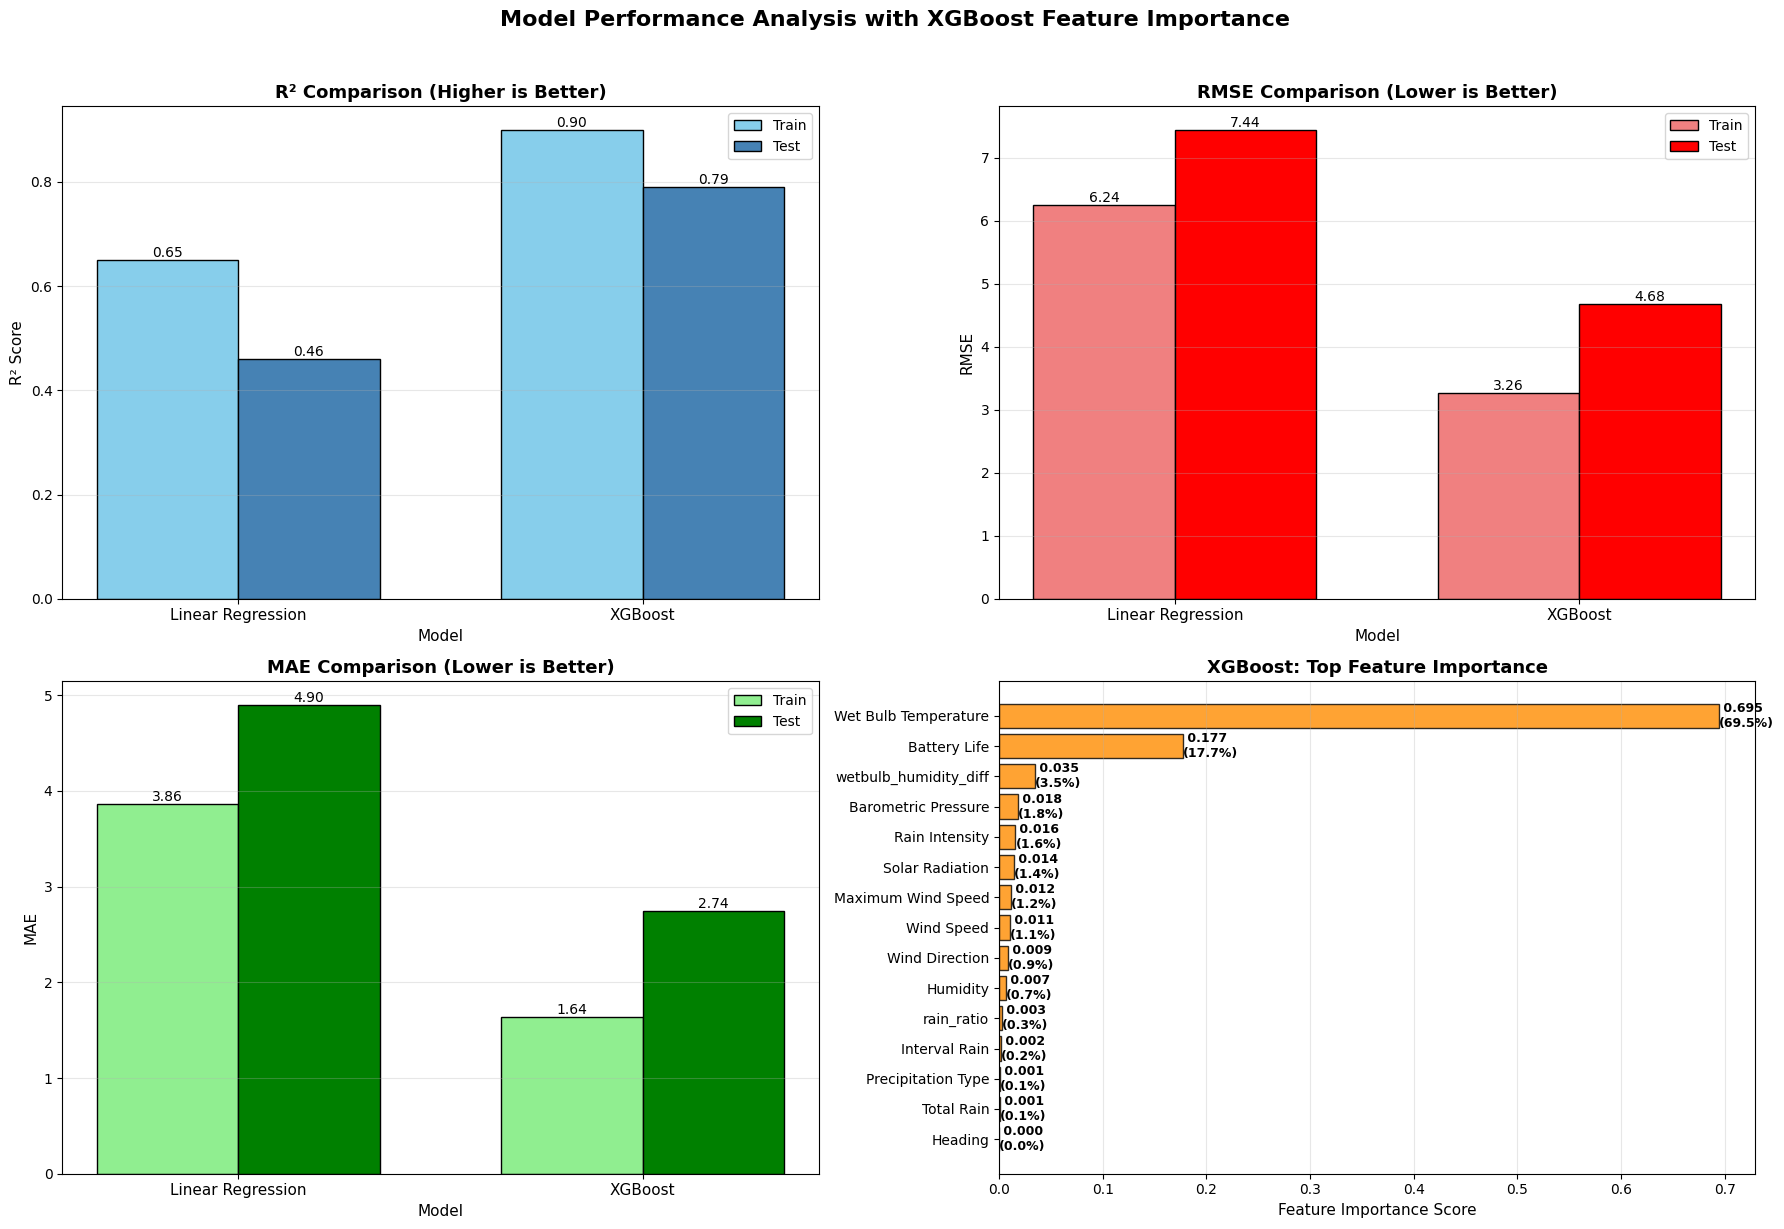

In [10]:
# Organize data by model
models = ['Linear Regression', 'XGBoost']
train_test_labels = ['Train', 'Test']

# Data organized by model
model_data = {
    'R²': {
        'Linear Regression': {'Train': r2_floats[0], 'Test': r2_floats[1]},
        'XGBoost': {'Train': r2_floats[2], 'Test': r2_floats[3]}
    },
    'RMSE': {
        'Linear Regression': {'Train': rmse_floats[0], 'Test': rmse_floats[1]},
        'XGBoost': {'Train': rmse_floats[2], 'Test': rmse_floats[3]}
    },
    'MAE': {
        'Linear Regression': {'Train': mae_floats[0], 'Test': mae_floats[1]},
        'XGBoost': {'Train': mae_floats[2], 'Test': mae_floats[3]}
    }
}


# Create figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Flatten axes for easier iteration (for the first 3 plots)
axes_flat = axes.flatten()

# Plot 1: R² Comparison
ax1 = axes[0, 0]
x = np.arange(len(models))
width = 0.35

train_r2 = [model_data['R²'][m]['Train'] for m in models]
test_r2 = [model_data['R²'][m]['Test'] for m in models]

bars1 = ax1.bar(x - width/2, train_r2, width, label='Train', 
                color='skyblue', edgecolor='black')
bars2 = ax1.bar(x + width/2, test_r2, width, label='Test', 
                color='steelblue', edgecolor='black')

ax1.set_xlabel('Model', fontsize=11)
ax1.set_ylabel('R² Score', fontsize=11)
ax1.set_title('R² Comparison (Higher is Better)', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(models, fontsize=11)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)
for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Plot 2: RMSE Comparison
ax2 = axes[0, 1]
train_rmse = [model_data['RMSE'][m]['Train'] for m in models]
test_rmse = [model_data['RMSE'][m]['Test'] for m in models]

bars3 = ax2.bar(x - width/2, train_rmse, width, label='Train', 
                color='lightcoral', edgecolor='black')
bars4 = ax2.bar(x + width/2, test_rmse, width, label='Test', 
                color='red', edgecolor='black')

ax2.set_xlabel('Model', fontsize=11)
ax2.set_ylabel('RMSE', fontsize=11)
ax2.set_title('RMSE Comparison (Lower is Better)', fontsize=13, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(models, fontsize=11)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar in bars3:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)
for bar in bars4:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Plot 3: MAE Comparison
ax3 = axes[1, 0]
train_mae = [model_data['MAE'][m]['Train'] for m in models]
test_mae = [model_data['MAE'][m]['Test'] for m in models]

bars5 = ax3.bar(x - width/2, train_mae, width, label='Train', 
                color='lightgreen', edgecolor='black')
bars6 = ax3.bar(x + width/2, test_mae, width, label='Test', 
                color='green', edgecolor='black')

ax3.set_xlabel('Model', fontsize=11)
ax3.set_ylabel('MAE', fontsize=11)
ax3.set_title('MAE Comparison (Lower is Better)', fontsize=13, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(models, fontsize=11)
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar in bars5:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)
for bar in bars6:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# ========== PLOT 4: FEATURE IMPORTANCE ==========
ax4 = axes[1, 1]

# Create horizontal bar plot for feature importance
y_pos = np.arange(len(feature_importance))
top_scores = feature_importance["importance"]
top_features = feature_importance["feature"]
bars_importance = ax4.barh(y_pos, top_scores, color='darkorange', edgecolor='black', alpha=0.8)

ax4.set_xlabel('Feature Importance Score', fontsize=11)
ax4.set_title(f'XGBoost: Top Feature Importance', fontsize=13, fontweight='bold')
ax4.set_yticks(y_pos)
ax4.set_yticklabels(top_features, fontsize=10)  # ← FIXED: Use top_features, not a string!
ax4.invert_yaxis()  # Highest importance at top
ax4.grid(True, alpha=0.3, axis='x')

# Add value labels (as percentages)
total_importance = sum(top_scores)
for i, (bar, score) in enumerate(zip(bars_importance, top_scores)):
    width = bar.get_width()
    percentage = (score / total_importance) * 100
    ax4.text(width, bar.get_y() + bar.get_height()/2.,
             f' {score:.3f}\n({percentage:.1f}%)', 
             va='center', fontsize=9, fontweight='bold')

plt.suptitle('Model Performance Analysis with XGBoost Feature Importance', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

fig.savefig('output/q8_final_visualizations.png', dpi = 150)


### 2. `output/q8_summary.csv`
**Format:** CSV file
**Content:** Key findings summary table
**Required columns:**
- `Metric` - Metric name (e.g., "R² Score", "RMSE", "MAE")
- One column per model (e.g., `Linear Regression`, `Random Forest`, `XGBoost`)

**Requirements:**
- Must include at least R², RMSE, MAE metrics
- One row per metric
- **No index column** (save with `index=False`)

**Example:**
```csv
Metric,Linear Regression,Random Forest,XGBoost
R² Score,-0.0201,0.9705,0.9967
RMSE,12.7154,2.1634,0.7276
MAE,9.8468,1.3545,0.4480
```

In [12]:
summary_df = pd.DataFrame({
    'Metric': ['R² Score', 'RMSE', 'MAE'],
    'Linear Regression': [r2_floats[1], rmse_floats[1], mae_floats[1]],
    'XGBoost': [r2_floats[3], rmse_floats[3], mae_floats[3]]
})

summary_df.to_csv('output/q8_summary.csv', index = False)


### 3. `output/q8_key_findings.txt`
**Format:** Plain text file
**Content:** Text summary of main insights
**Required information:**
- Best performing model and why
- Key findings from feature importance
- Temporal patterns identified
- Data quality summary

**Example format:**
```
KEY FINDINGS SUMMARY
===================

MODEL PERFORMANCE:
- Best performing model: XGBoost (R² = 0.9967)
- All models show reasonable performance (R² > 0.7 for tree-based models)
- XGBoost achieves lowest RMSE: 0.73°C

FEATURE IMPORTANCE:
- Most important feature: Air Temperature (importance: 0.6539)
- Top 3 features account for 93.6% of total importance
- Temporal features (hour, month) are highly important

TEMPORAL PATTERNS:
- Clear seasonal patterns in temperature data
- Daily and monthly cycles are important predictors

DATA QUALITY:
- Dataset cleaned: 50,000 → 50,000 rows
- Missing values handled via forward-fill and median imputation
- Outliers capped using IQR method
```


In [19]:
raw_df = pd.read_csv("data/beach_sensors.csv")
clean_df = pd.read_csv("output/q2_cleaned_data.csv")
rows_before = raw_df.shape[0]
rows_after = clean_df.shape[0]
report = f"""KEY FINDINGS SUMMARY
===================

MODEL PERFORMANCE:
- Best performing model: XGBoost (R² = {summary_df['XGBoost'][0]:.2f})
- Linear Regression did a pretty bad job in prediction, which has test R²: {summary_df['Linear Regression'][0]:.2f}
- XGBoost achieves lowest RMSE: {summary_df['XGBoost'][1]:.2f}

FEATURE IMPORTANCE:
- Most important feature: {top_features[0]} (importance: {top_scores[0]:.3f}) 
- Top 3 features account for {sum(top_scores[0:3])*100:.2f}% of total importance

DATA QUALITY:
- Dataset cleaned: {rows_before} → {rows_after} rows
- Missing values handled via mean and mode imputation
- Outliers capped using IQR method

"""
with open("output/q8_key_findings.txt", "w") as f:
    f.write(report)